In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import matplotlib.pyplot as plt
import cv2
import pickle

In [3]:
path = '/content/drive/MyDrive/Colab Notebooks/Data/'
fileObj = open( path + 'X_train', 'rb')
X_train = pickle.load(fileObj)
fileObj.close()

fileObj = open( path +'Y_train', 'rb')
Y_train = pickle.load(fileObj)
fileObj.close()

fileObj = open( path +'X_valid', 'rb')
X_valid = pickle.load(fileObj)
fileObj.close()

fileObj = open( path +'Y_valid', 'rb')
Y_valid = pickle.load(fileObj)
fileObj.close()

fileObj = open( path +'X_test', 'rb')
X_test = pickle.load(fileObj)
fileObj.close()

fileObj = open( path +'Y_test', 'rb')
Y_test = pickle.load(fileObj)
fileObj.close()

fileObj = open( path +'mean_img', 'rb')
mean_img = pickle.load(fileObj)
fileObj.close()

In [4]:
print(X_train.shape)
print(Y_train.shape)
print(X_valid.shape)
print(Y_valid.shape)
print(X_test.shape)
print(Y_test.shape)

(10000, 100, 100, 3)
(10000,)
(800, 100, 100, 3)
(800,)
(992, 100, 100, 3)
(992,)


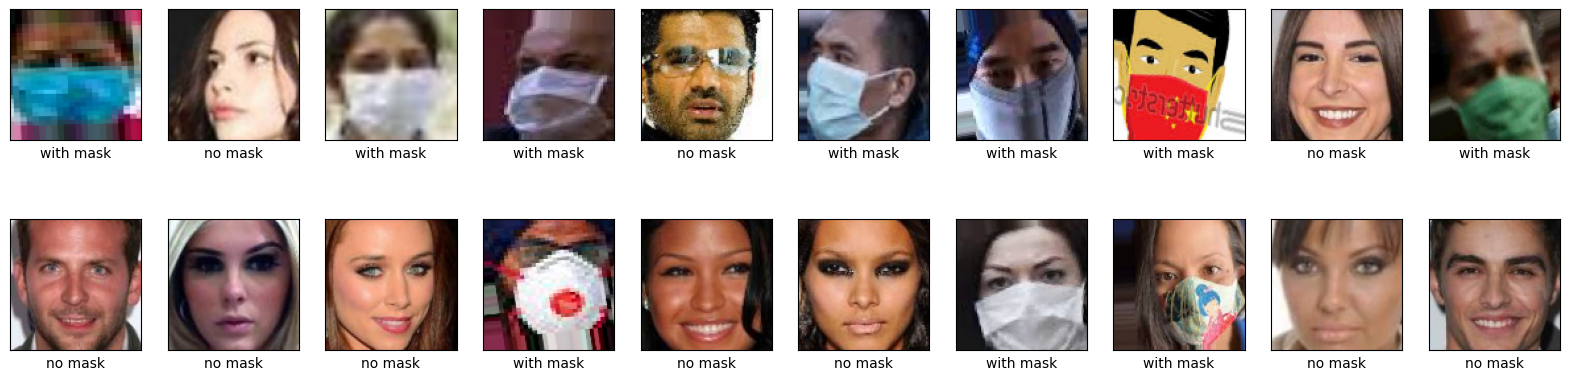

In [5]:

plt.figure(figsize=(20,5))
for i in range(20):
  plt.subplot(2, 10, i+1)
  plt.imshow(X_train[i].astype('uint8'))
  plt.xlabel("with mask" if Y_train[i]==0 else "no mask")
  plt.xticks([])
  plt.yticks([])
plt.show()

In [6]:
import numpy as np

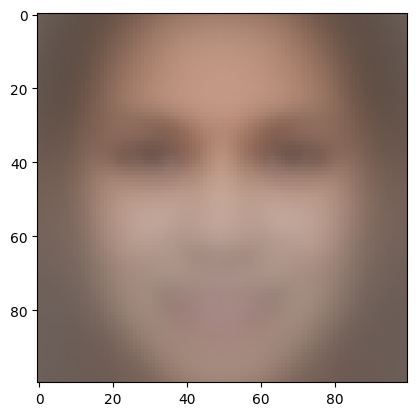

In [7]:
mean_img = np.mean(X_train, axis=0)
plt.imshow(mean_img.astype('uint8'))

In [8]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [9]:
model = keras.Sequential([
    keras.Input(shape=X_train.shape[1:]),
    layers.Conv2D(filters=64, kernel_size=(11,11),strides=(4,4), padding='valid', activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    layers.BatchNormalization(),

    layers.Conv2D(filters=128, kernel_size=(5,5),strides=(1,1), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    layers.BatchNormalization(),

    layers.Conv2D(filters=256, kernel_size=(3,3),strides=(1,1), padding='same', activation='relu'),
    layers.BatchNormalization(),

    layers.Conv2D(filters=512, kernel_size=(3,3),strides=(1,1), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(filters=512, kernel_size=(3,3),strides=(1,1), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    layers.BatchNormalization(),
    layers.Flatten(),
    layers.Dense(units=4096, activation='relu'),
    layers.Dropout(0.4),
    layers.BatchNormalization(),
    layers.Dense(units=4096, activation='relu'),
    layers.Dropout(0.4),
    layers.BatchNormalization(),
    layers.Dense(units=1, activation='sigmoid')

])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 23, 23, 64)        23296     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 11, 11, 64)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 11, 11, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 128)       204928    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 128)        0         
 2D)                                                             
                                                        

In [10]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001),
    loss=tf.keras.losses.binary_crossentropy,
    metrics=['accuracy']
)

In [11]:
h = model.fit(x=X_train, y=Y_train, epochs=50, batch_size=64, validation_data=(X_valid, Y_valid))

Epoch 1/50
157/157 [==============================] - 15s 34ms/step - loss: 0.2868 - accuracy: 0.8778 - val_loss: 0.3497 - val_accuracy: 0.8450
Epoch 2/50
157/157 [==============================] - 4s 27ms/step - loss: 0.1198 - accuracy: 0.9538 - val_loss: 0.0987 - val_accuracy: 0.9712
Epoch 3/50
157/157 [==============================] - 4s 26ms/step - loss: 0.0691 - accuracy: 0.9753 - val_loss: 0.0733 - val_accuracy: 0.9712
Epoch 4/50
157/157 [==============================] - 4s 26ms/step - loss: 0.0482 - accuracy: 0.9819 - val_loss: 0.0576 - val_accuracy: 0.9775
Epoch 5/50
157/157 [==============================] - 4s 28ms/step - loss: 0.0288 - accuracy: 0.9900 - val_loss: 0.0511 - val_accuracy: 0.9800
Epoch 6/50
157/157 [==============================] - 4s 27ms/step - loss: 0.0232 - accuracy: 0.9920 - val_loss: 0.0410 - val_accuracy: 0.9837
Epoch 7/50
157/157 [==============================] - 4s 27ms/step - loss: 0.0180 - accuracy: 0.9941 - val_loss: 0.0382 - val_accuracy: 0.986

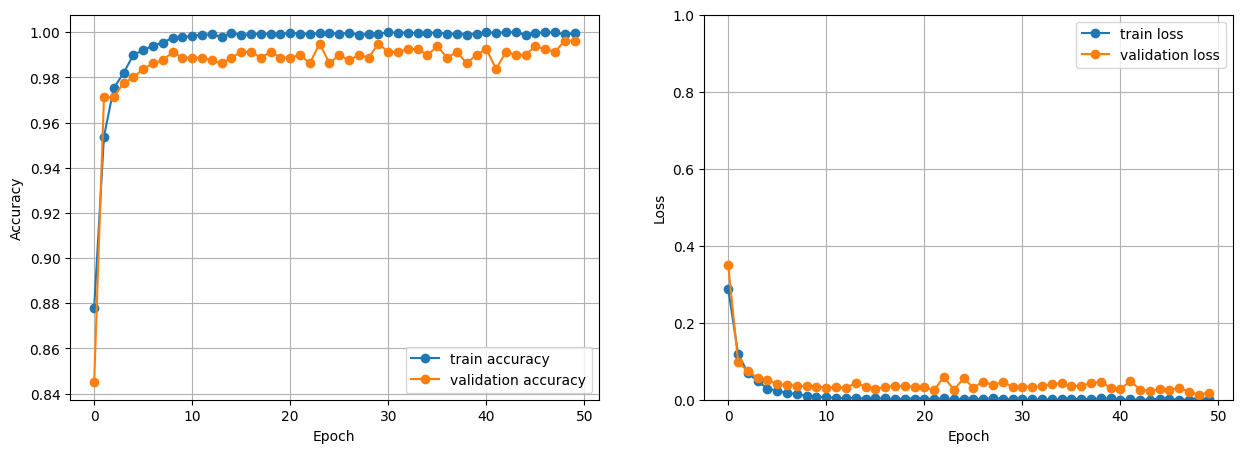

In [12]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [13]:
model.evaluate(X_test, Y_test)

31/31 [==============================] - 0s 9ms/step - loss: 0.0401 - accuracy: 0.9919


[0.04010352864861488, 0.9919354915618896]

In [17]:
test_img = X_test[100]
predictions = model.predict(np.array([test_img]))
binary_prediction = (predictions > 0.5).astype(int)
print(binary_prediction)
print(Y_test[100])

1/1 [==============================] - 0s 21ms/step
[[0]]
0


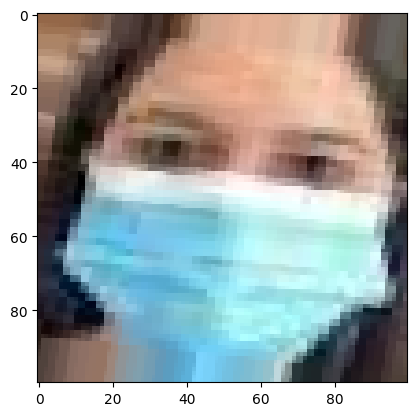

In [18]:
plt.imshow(X_test[100].astype('uint8'))

In [16]:
model.save('/content/drive/MyDrive/Colab Notebooks/my_model.h5')